**Instituto de Informática - UFG**

**Disciplina: Computação paralela 2020/1**

**Professor: Wellington Martins**

**Aluno: Victor Alexandre de Carvalho Coelho**




#Especificação do trabalho


**Descrição:** O objetivo deste trabalho é de sugerir melhorias na implementação do algoritmo proposto por [[Jain et al. 2016]](https://https://ieeexplore.ieee.org/document/7509360) com a finalidade de obter melhor desempenho; e também, **demonstrar *integralmente* o processo de implementação**.

**Descrição:** O objetivo deste trabalho é de prover, detalhadamente, a implementação de um detector de bordas usando abordagens distintas, e também, fazer comparações entre elas a fim de se identificar qual abordagem possui melhor desempenho (speedup). Este trabalho possui como inspiração o artigo de [[Jain et al. 2016]](https://https://ieeexplore.ieee.org/document/7509360).


Será usado CUDA-Python onde o código será executado na GPU disponível no ambiente do google colab. E, por se tratar de processamento de imagens, usaremos também OpenCV.

**Resumo da abordagem de** [[Jain et al. 2016]](https://https://ieeexplore.ieee.org/document/7509360):

**Resumo da minha abordagem:**

**Nota do autor:** Na elaboração deste trabalho, fiz várias pesquisas em artigos que propunham implementações paralelas e em nenhum deles foi disponibilizado o código fonte ou sequer algum detalhe da implementação. Se o objetivo destes trabalhos for de beneficiar uma entidade (jurídica ou física) em particular, então, creio que essa atitude seja aceitável. Agora, se o objetivo destes artigos é de expandir o conhecimento científico, me sinto na obrigação de me expressar e dizer que eles estão totalmente na contra-mão.


Dito isto, quero estabelecer que o mínimo de transparência que um trabalho deve ter é igual ao mostrado por mim neste trabalho.

#Rascunho de comandos para ver algumas configurações da máquina

In [ ]:
#Comando para ver as configurações da placa de vídeo
#!nvidia-smi
!lspci | grep -i --color 'vga\|3d\|2d'

/bin/bash: lspci: command not found


In [ ]:
#Comando para ver as configurações da CPU
!lscpu


Architecture:        x86_64
CPU op-mode(s):      32-bit, 64-bit
Byte Order:          Little Endian
CPU(s):              2
On-line CPU(s) list: 0,1
Thread(s) per core:  2
Core(s) per socket:  1
Socket(s):           1
NUMA node(s):        1
Vendor ID:           GenuineIntel
CPU family:          6
Model:               63
Model name:          Intel(R) Xeon(R) CPU @ 2.30GHz
Stepping:            0
CPU MHz:             2300.000
BogoMIPS:            4600.00
Hypervisor vendor:   KVM
Virtualization type: full
L1d cache:           32K
L1i cache:           32K
L2 cache:            256K
L3 cache:            46080K
NUMA node0 CPU(s):   0,1
Flags:               fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm invpcid_single ssbd ibrs 

In [ ]:
#Versão da distribuição
!lsb_release -a

No LSB modules are available.
Distributor ID:	Ubuntu
Description:	Ubuntu 18.04.3 LTS
Release:	18.04
Codename:	bionic


In [ ]:
#Versão do kernel
!cat /proc/version

Linux version 4.19.112+ (builder@a12462ca91c8) (Chromium OS 10.0_pre377782_p20200113-r10 clang version 10.0.0 (/var/cache/chromeos-cache/distfiles/host/egit-src/llvm-project 4e8231b5cf0f5f62c7a51a857e29f5be5cb55734)) #1 SMP Thu Jul 23 08:00:38 PDT 2020


In [ ]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


#Daqui pra cima é lixo (não precisamos instalar a última versão do Cuda, a 10 ja é suficiente).

#Codificação

**O primeiro passo é trocar o runtime do google colab para GPU**

In [ ]:
!cmake --version

cmake version 3.12.0

CMake suite maintained and supported by Kitware (kitware.com/cmake).


In [ ]:
#Versão do OpenCV
!pkg-config --modversion opencv

3.2.0


In [ ]:
#Detalhes da placa de vídeo
!nvidia-smi

Sat Sep 12 14:33:34 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.66       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   61C    P8    11W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
#Detalhes do compilador
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


In [ ]:
#Instalando complemento para poder executar o nvcc a partir das células do notebook
!pip install git+git://github.com/andreinechaev/nvcc4jupyter.git

  Cloning git://github.com/andreinechaev/nvcc4jupyter.git to /tmp/pip-req-build-n2021rb2
  Running command git clone -q git://github.com/andreinechaev/nvcc4jupyter.git /tmp/pip-req-build-n2021rb2
  Created wheel for NVCCPlugin: filename=NVCCPlugin-0.0.2-cp36-none-any.whl size=4307 sha256=cfecf4fcdab4b36e60d67d8bb11258d4e7cd9dfe7b161a27ccf68ef655020e65
  Stored in directory: /tmp/pip-ephem-wheel-cache-rxzrdsqt/wheels/10/c2/05/ca241da37bff77d60d31a9174f988109c61ba989e4d4650516
Successfully built NVCCPlugin


In [ ]:
#Carregando extensão
%load_ext nvcc_plugin

created output directory at /content/src
Out bin /content/result.out


**Exemplo de código em cuda**

In [ ]:
%%cu
#include <stdio.h>
#include <stdlib.h>
__global__ void add(int *a, int *b, int *c) {
*c = *a + *b;
}
int main() {
int a, b, c;
// host copies of variables a, b & c
int *d_a, *d_b, *d_c;
// device copies of variables a, b & c
int size = sizeof(int);
// Allocate space for device copies of a, b, c
cudaMalloc((void **)&d_a, size);
cudaMalloc((void **)&d_b, size);
cudaMalloc((void **)&d_c, size);
// Setup input values  
c = 0;
a = 3;
b = 5;
// Copy inputs to device
cudaMemcpy(d_a, &a, size, cudaMemcpyHostToDevice);
  cudaMemcpy(d_b, &b, size, cudaMemcpyHostToDevice);
// Launch add() kernel on GPU
add<<<1,1>>>(d_a, d_b, d_c);
// Copy result back to host
cudaError err = cudaMemcpy(&c, d_c, size, cudaMemcpyDeviceToHost);
  if(err!=cudaSuccess) {
      printf("CUDA error copying to Host: %s\n", cudaGetErrorString(err));
  }
printf("result is %d\n",c);
// Cleanup
cudaFree(d_a);
cudaFree(d_b);
cudaFree(d_c);
return 0;
}

result is 8



In [ ]:
a = 16

In [ ]:
a


16

**Mostrando as imagens na tela**


In [ ]:
%matplotlib inline

import matplotlib
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

img_in_gray    =mpimg.imread('in.pgm')
img_in_color   =mpimg.imread('in.ppm')
img_out        =mpimg.imread('out.pgm')
img_out_rgb    =mpimg.imread('out_rgb.ppm')
img_in_out_yuv =mpimg.imread('out_yuv.ppm')
img_in_out_hsl =mpimg.imread('out_hsl.ppm')

print(" img_in_gray :")
plt.imshow(img_in_gray)
plt.show()

print("img_in_color: ")
plt.imshow(img_in_color)
plt.show()

print(" img_out:")
plt.imshow(img_out)
plt.show()

print(" img_out_rgb:")
plt.imshow(img_out_rgb)
plt.show()

print("img_in_out_yuv: ")
plt.imshow(img_in_out_yuv)
plt.show()

print("img_in_out_hsl: ")
plt.imshow(img_in_out_hsl)
plt.show()

print("done.")

Teste código OpenCV


In [ ]:
!echo $PWD

/content


In [ ]:
teste0 = """
/**
 * @brief      Hello Wolrd with an empty kernel.
 *
 *             This is a basic Hello World example where we use our first
 *             kernel, ableit empty.
 *
 *             From: http://www.nvidia.com/docs/io/116711/sc11-cuda-c-basics.pdf
 */
 
#include <iostream>
#include <string>

 
/**
 * @brief      Emtpy kernel
 */
__global__ void mykernel(void) {

}

int main(void) {
	mykernel<<<1,1>>>();
	std::cout << "Hello world!" << std::endl;
}
"""

In [ ]:
text_file = open("teste0.cu", "w")
text_file.write(teste0)
text_file.close()

In [ ]:
!nvcc -o test0 teste0.cu `pkg-config opencv --cflags --libs`  

In [ ]:
!./test0

Hello world!


In [ ]:
% cd /content

/content


In [ ]:
! pwd

/content


In [ ]:
%%writefile teste1.cu
/**
 * @brief      Image inversion.
 *
 *             This example provides a kernel that inverts the input image.
 *             However, this time it is performed by making use of readily
 *             available containers from Open CV. By starting with the low-level
 *             implementations from the previous example, we can now better
 *             understand what the available GpuMat object from Open CV exactly
 *             does: constructing and destructing a GpuMat allocates and frees
 *             GPU memory, whereas uploading and downloading perform the copying
 *             of the memory.
 *
 *             In addition, an Open CV object is used to make it easier to
 *             iterate over the raw image data, independent of the underlying
 *             data type and dimensions. To support both single-channel black
 *             and white images as well as color images, the kernel is turned
 *             into a template. Basic operations are provided for different
 *             underlying data types.
 *
 *             From: https://stackoverflow.com/a/35621962/6207953
 *
 *             Built-in data types from:
 *             http://docs.nvidia.com/cuda/cuda-c-programming-guide/index.html#built-in-vector-types
 */
#include <iostream>
#include <string>
#include <cuda_runtime.h>
#include <opencv2/opencv.hpp>  
#include <opencv2/core/cuda/common.hpp>


// global variables
cv::cuda::GpuMat ginput, goutput;


/**
 * @brief      Sets the value of a uchar type.
 *
 * @param[in]  val   The value
 * @param      out   The output
 */
__device__ __forceinline__ void set_value(const int& val, uchar& out) {
    out = val;
}

/**
 * @brief      Sets the value of a uchar3 type.
 *
 * @param[in]  val   The value
 * @param      out   The output
 */
__device__ __forceinline__ void set_value(const int& val, uchar3& out) {
    out.x = val;
    out.y = val;
    out.z = val;
}

/**
 * @brief      Subtraction for uchar3 types.
 *
 * @param[in]  in1   Input 1
 * @param[in]  in2   Input 2
 *
 * @return     Output
 */
__device__ __forceinline__ uchar3 subtract_value(uchar3 in1, uchar3 in2) {
	uchar3 out;
    out.x = in1.x - in2.x;
    out.y = in1.y - in2.y;
    out.z = in1.z - in2.z;
    return out;
}

/**
 * @brief      Subtraction for uchar types.
 *
 * @param[in]  in1   Input 1
 * @param[in]  in2   Input 2
 *
 * @return     Output
 */
__device__ __forceinline__ uchar subtract_value(uchar in1, uchar in2) {
	uchar out;
    out = in1 - in2;
    return out;
}

/**
 * @brief      The invert kernel.
 *
 *             This implementation uses some higher level open cv structures,
 *             based on:
 *
 *             https://stackoverflow.com/a/35621962/6207953
 *
 * @param[in]  input   The input
 * @param[in]  output  The output
 *
 * @tparam     T_in    The input type
 * @tparam     T_out   The output type
 */
template <typename T_in, typename T_out>
__global__ void invert_kernel_2(const cv::cuda::PtrStepSz<T_in> input, cv::cuda::PtrStepSz<T_out> output) {
  const int x = blockIdx.x * blockDim.x + threadIdx.x;
  const int y = blockIdx.y * blockDim.y + threadIdx.y;

  if (x >= input.cols || y >= input.rows)
      return;

  T_out value;
  set_value(255, value);

  T_out result;
  result = subtract_value(value, input(y,x));

  output(y, x) = result;

}

/**
 * @brief      Initializes the invert kernel
 *
 *             Performs the required memory allocation on the CPU and GPU.
 *
 * @param[in]  input   The input
 * @param      output  The output
 */
void invert_kernel_2_init(const cv::Mat& input, cv::Mat& output) {
	ginput.create(input.rows, input.cols, input.type());
    goutput.create(output.rows, output.cols, output.type());
}

/**
 * @brief      Terminates the invert kernel
 *
 *             Performs the required memory cleanup on the CPU and GPU.
 *
 * @param[in]  input   The input
 * @param      output  The output
 */
void invert_kernel_2_exit(const cv::Mat& input, cv::Mat& output) {
	ginput.release();
	goutput.release();
}

/**
 * @brief      Calls the invert kernel.
 *
 * @param[in]  input   The input
 * @param[in]  output  The output
 */
void call_invert_kernel_2(const cv::cuda::GpuMat& input, cv::cuda::GpuMat& output) {
	// Assert
	CV_Assert(input.channels() == 1 || input.channels() == 3); 

    // Specify a reasonable block size
	const dim3 block(16,16);

	// Calculate grid size to cover the whole image
	const dim3 grid(cv::cuda::device::divUp(input.cols, block.x), cv::cuda::device::divUp(input.rows, block.y));

	// Launch kernel
	if (input.channels() == 1) {
	  invert_kernel_2<uchar, uchar><<<grid, block>>>(input, output);
	}
	else if (input.channels() == 3) {
	  invert_kernel_2<uchar3, uchar3><<<grid, block>>>(input, output);
	}

  // Get last error
  cudaSafeCall(cudaGetLastError() );
}

/**
 * @brief      Wrapper for the invert kernel.
 *
 *             This implementation uses some higher level open cv structures,
 *             based on:
 *
 *             https://stackoverflow.com/a/35621962/6207953
 *
 * @param[in]  input   The input
 * @param[in]  output  The output
 */
void invert_kernel_2(const cv::Mat& input, cv::Mat& output) {
  ginput.upload(input);
  call_invert_kernel_2(ginput, goutput);    
  goutput.download(output);
}


// ----------------------------------------------------------------------


int main() {
	// Read input image from the disk
	std::string imagePath = "image.jpg";
	cv::Mat input = cv::imread(imagePath,CV_LOAD_IMAGE_COLOR);

	if(input.empty())	{
		std::cout<<"Image Not Found!"<<std::endl;
		std::cin.get();
		return -1;
	}

	// Create output image
	cv::Mat output = cv::Mat::zeros(input.rows,input.cols,CV_8UC3);

	// Call the wrapper function
	invert_kernel_2_init(input, output);
	invert_kernel_2(input, output);
	invert_kernel_2_exit(input, output);

	// Show the input and output
	//cv::imshow("Input",input);
	//cv::imshow("Output",output);
	
	// Wait for key press
	//cv::waitKey();

	return 0;
}


Writing teste1.cu


In [ ]:
%%writefile teste1.cu
#include <iostream>
using namespace std;

#include <opencv2/core.hpp>
using namespace cv;

//#include <opencv2/cudaarithm.hpp>
using namespace cv::cuda;

#include <cuda_runtime.h>

int main()
{
    printShortCudaDeviceInfo(getDevice());
    int cuda_devices_number = getCudaEnabledDeviceCount();
    cout << "CUDA Device(s) Number: "<< cuda_devices_number << endl;
    DeviceInfo _deviceInfo;
    bool _isd_evice_compatible = _deviceInfo.isCompatible();
    cout << "CUDA Device(s) Compatible: " << _isd_evice_compatible << endl;
    return 0;
}

Overwriting teste1.cu


In [ ]:
!nvcc teste1.cu -o teste1 -I /usr/local/include/opencv  `pkg-config opencv --cflags --libs`

teste1.cu(14): error: identifier "getDevice" is undefined

teste1.cu(14): error: identifier "printShortCudaDeviceInfo" is undefined

teste1.cu(15): error: identifier "getCudaEnabledDeviceCount" is undefined

teste1.cu(17): error: identifier "DeviceInfo" is undefined

4 errors detected in the compilation of "/tmp/tmpxft_00000125_00000000-8_teste1.cpp1.ii".


In [ ]:
!nvcc teste1.cu -o teste1 -I /usr/local/include/opencv  -lm -lopencv_objdetect -lopencv_features2d -lopencv_imgproc -lopencv_highgui -lopencv_core -lopencv_imgcodecs 

teste1.cu:7:10: fatal error: opencv2/cudaarithm.hpp: No such file or directory
 #include <opencv2/cudaarithm.hpp>
          ^~~~~~~~~~~~~~~~~~~~~~~~
compilation terminated.


In [ ]:
!nvcc -o teste1 teste1.cu `pkg-config opencv --cflags --libs`  

In [ ]:
!g++ `pkg-config opencv --cflags --libs` -o teste1 teste1.cpp

teste1.cpp:7:10: fatal error: opencv2/cudaarithm.hpp: No such file or directory
 #include <opencv2/cudaarithm.hpp>
          ^~~~~~~~~~~~~~~~~~~~~~~~
compilation terminated.


In [ ]:
!./teste1

OpenCV Error: No CUDA support (The library is compiled without CUDA support) in throw_no_cuda, file /build/opencv-L2vuMj/opencv-3.2.0+dfsg/modules/core/include/opencv2/core/private.cuda.hpp, line 97
terminate called after throwing an instance of 'cv::Exception'
  what():  /build/opencv-L2vuMj/opencv-3.2.0+dfsg/modules/core/include/opencv2/core/private.cuda.hpp:97: error: (-216) The library is compiled without CUDA support in function throw_no_cuda



In [ ]:
%%writefile para_victor.cu
#include <iostream>
#include <stdio.h>
#include <cuda_runtime.h>
#include <opencv2/opencv.hpp> 
#include <chrono>


using namespace cv;
using namespace std;

// Para executar compile assim: 
// !nvcc para_victor.cu -o para_victor -I /usr/local/include/opencv  -lm -lopencv_objdetect -lopencv_features2d -lopencv_imgproc -lopencv_highgui -lopencv_core -lopencv_imgcodecs -run

static inline void _safe_cuda_call(cudaError err, const char* msg, const char* file_name, const int line_number)
{
        if(err!=cudaSuccess)
        {
                fprintf(stderr,"%s\n\nFile: %s\n\nLine Number: %d\n\nReason: %s\n",msg,file_name,line_number,cudaGetErrorString(err));
                std::cin.get();
                exit(EXIT_FAILURE);
        }
}
#define SAFE_CALL(call,msg) _safe_cuda_call((call),(msg),__FILE__,__LINE__)


__global__ void md_kernel(unsigned char* img, uchar* output, int width, int height, int N) {
    
    //Index of current thread
    int tid = blockIdx.x * blockDim.x + threadIdx.x;
    
    if (tid >= width*height)
    {
        return;
    }

    //Stride by the total number of threads that have been launched
    while( tid < N ) {
        output[tid] = img[tid] + 20;
        tid += blockDim.x * gridDim.x;
    }
}

// The GPU wrapper function
void md_gpu_wrapper(const cv::Mat& h_img, cv::Mat& h_output, float* fps_gpu, float* elapsedTimeGPU){
    
    
    int deviceId;
    int numberOfSMs;

    cudaGetDevice(&deviceId);
    cudaDeviceGetAttribute(&numberOfSMs, cudaDevAttrMultiProcessorCount, deviceId);
    printf("Device ID: %d\tNumber of SMs: %d\n", deviceId, numberOfSMs);

    cudaDeviceProp props;
    cudaGetDeviceProperties(&props, deviceId);
  
    int computeCapabilityMajor = props.major;
    int computeCapabilityMinor = props.minor;
    int multiProcessorCount = props.multiProcessorCount;
    int warpSize = props.warpSize;
    printf("Device ID: %d\nNumber of SMs: %d\nCompute Capability Major: %d\nCompute Capability Minor: %d\nWarp Size: %d\n", deviceId, multiProcessorCount, computeCapabilityMajor, computeCapabilityMinor, warpSize);
       
    
    
    //int height = h_img.rows;
    //int width = h_img.cols;
    
    
    //Calculate total number of bytes of input and output images
        const int sizeBytes_input = h_img.step * h_img.rows;
    const int sizeBytes_output = h_output.step * h_output.rows;

    //Input and Output device variables
        unsigned char *d_img;
    uchar *d_output;
    
    //Measure executing time using cudaEvent
    cudaEvent_t e_start, e_stop;
    SAFE_CALL( cudaEventCreate(&e_start), "CUDA Event Failed" );
    SAFE_CALL( cudaEventCreate(&e_stop), "CUDA Event Failed" );
    SAFE_CALL( cudaEventRecord(e_start,0), "CUDA Event Start Record Failed" );
    
    //Measure Frame per Second (FPS)
    int64 start = cv::getTickCount();
 
    //Allocate device memory
        SAFE_CALL(cudaMalloc<unsigned char>(&d_img,sizeBytes_input),"CUDA Malloc Failed");
    SAFE_CALL(cudaMalloc<uchar>(&d_output,sizeBytes_output),"CUDA Malloc Failed");

        //Copy data from OpenCV input image to device memory
        SAFE_CALL(cudaMemcpy(d_img,h_img.ptr(),sizeBytes_input,cudaMemcpyHostToDevice),"CUDA Memcpy Host To Device Failed");
 
        //Specify a reasonable block size
        //const dim3 block(width/4.0f);
        const dim3 block(256);

        //Calculate grid size to cover the whole image
        //const dim3 grid(4*height);
    const dim3 grid(warpSize * numberOfSMs);

    //Launch the kernel
    md_kernel<<<grid,block>>>(d_img, d_output, h_img.cols, h_img.rows, sizeBytes_input);

        //Synchronize to check for any kernel launch errors
        SAFE_CALL(cudaDeviceSynchronize(),"Kernel Launch Failed");
    
    //Copy back data from destination device memory to OpenCV output image
        SAFE_CALL(cudaMemcpy(h_output.ptr(),d_output,sizeBytes_output,cudaMemcpyDeviceToHost),"CUDA Memcpy Device to Host Failed");
    
    //FPS
    *fps_gpu = cv::getTickFrequency() / (cv::getTickCount() - start);
    
    //Execution time
    SAFE_CALL( cudaEventRecord(e_stop,0), "CUDA Event Stop Record Failed" );
    SAFE_CALL( cudaEventSynchronize(e_stop), "CUDA Event Synchronize Failed" );
    SAFE_CALL( cudaEventElapsedTime(elapsedTimeGPU, e_start, e_stop), "CUDA cudaEventElapsedTime Failed" ); //elapsedTimeGPU in milliseconds

        //Free the device memory
        SAFE_CALL(cudaFree(d_img),"CUDA Free Failed");
        SAFE_CALL(cudaFree(d_output),"CUDA Free Failed");
    SAFE_CALL(cudaEventDestroy(e_start), "CUDA Event Destroy Failed");
    SAFE_CALL(cudaEventDestroy(e_stop), "CUDA Event Destroy Failed");    
}

//CPU calculation
void md_cpu(const cv::Mat& img, cv::Mat& output_cpu, int width, int height){
    for( int i = 0; i < height; i++){
        for( int j = 0; j < width; j++){
            output_cpu.at<uchar>(i,j) = img.at<uchar>(i,j) + 20;
        }
    }
}

// The CPU wrapper function
void md_cpu_wrapper(const cv::Mat& img, cv::Mat& output_cpu, float* fps_cpu, float* elapsedTimeCPU){
        
    //Measure CPU time
    auto begin = std::chrono::high_resolution_clock::now();

    //Measure Frame per Second (FPS)
    int64 start = cv::getTickCount();
    
    //call the cpu calculation method
    md_cpu(img, output_cpu, img.cols, img.rows); 
    
    //FPS
    *fps_cpu = cv::getTickFrequency() / (cv::getTickCount() - start);
    
    //Execution Time
    auto end = std::chrono::high_resolution_clock::now();
    auto fs = std::chrono::duration<float>(end - begin);
    *elapsedTimeCPU = fs.count() * 1000; // in milliseconds
}


//Main function
int main()
{
        //Read the image from the disk
        cv::Mat img = cv::imread("image.jpg",0);
     

        if(img.empty())
        {
                std::cout<<"Image Not Found!"<<std::endl;
                std::cin.get();
                return -1;
        }
    
        //Create the output image for GPU
        cv::Mat output_gpu(img.rows,img.cols,CV_8UC1,Scalar(0));
 
        // **** Call the GPU wrapper function
    float elapsedTimeGPU;
    float fps_gpu;
        md_gpu_wrapper(img, output_gpu, &fps_gpu, &elapsedTimeGPU);

    //Create the output image for CPU
        cv::Mat output_cpu(img.rows,img.cols,CV_8UC1,Scalar(0));

    // **** Call the CPU wrapper function
    float elapsedTimeCPU;
    float fps_cpu;
    md_cpu_wrapper(img, output_cpu, &fps_cpu, &elapsedTimeCPU);
       
    // **** Print Results
    std::cout << "FPS GPU: " << fps_gpu << std::endl;
    std::cout << "Time GPU: " << elapsedTimeGPU / 1000 <<" s" << std::endl; //print in seconds
    std::cout << "FPS CPU: " << fps_cpu << std::endl;
    std::cout << "Time CPU: " << elapsedTimeCPU / 1000 <<" s" << std::endl; //print in seconds

    //Speedup evaluation
    float speedup = elapsedTimeCPU / elapsedTimeGPU;
    std::cout<< "Speedup: " << speedup << std::endl;
       
    imwrite("output.png", output_gpu);

        return 0;
}

Writing para_victor.cu


In [ ]:
!nvcc para_victor.cu -o para_victor -I /usr/local/include/opencv  `pkg-config opencv --cflags --libs`   -run

Device ID: 0	Number of SMs: 40
Device ID: 0
Number of SMs: 40
Compute Capability Major: 7
Compute Capability Minor: 5
Warp Size: 32
FPS GPU: 2768.8
Time GPU: 0.000363712 s
FPS CPU: 593.108
Time CPU: 0.00168641 s
Speedup: 4.63665


In [ ]:
%%cu
#include "opencv2/imgproc.hpp"
#include "opencv2/imgcodecs.hpp"
#include "opencv2/highgui.hpp"
#include <iostream>
using namespace cv;
using namespace std;
int main( int argc, char** argv )
{
  cv::CommandLineParser parser(argc, argv,
                               "{@input   |lena.jpg|input image}"
                               "{ksize   k|1|ksize (hit 'K' to increase its value at run time)}"
                               "{scale   s|1|scale (hit 'S' to increase its value at run time)}"
                               "{delta   d|0|delta (hit 'D' to increase its value at run time)}"
                               "{help    h|false|show help message}");
  cout << "The sample uses Sobel or Scharr OpenCV functions for edge detection\n\n";
  parser.printMessage();
  cout << "\nPress 'ESC' to exit program.\nPress 'R' to reset values ( ksize will be -1 equal to Scharr function )";
  // First we declare the variables we are going to use
  Mat image,src, src_gray;
  Mat grad;
  const String window_name = "Sobel Demo - Simple Edge Detector";
  int ksize = parser.get<int>("ksize");
  int scale = parser.get<int>("scale");
  int delta = parser.get<int>("delta");
  int ddepth = CV_16S;
  String imageName = parser.get<String>("@input");
  // As usual we load our source image (src)
  image = imread( samples::findFile( imageName ), IMREAD_COLOR ); // Load an image
  // Check if image is loaded fine
  if( image.empty() )
  {
    printf("Error opening image: %s\n", imageName.c_str());
    return EXIT_FAILURE;
  }
  for (;;)
  {
    // Remove noise by blurring with a Gaussian filter ( kernel size = 3 )
    GaussianBlur(image, src, Size(3, 3), 0, 0, BORDER_DEFAULT);
    // Convert the image to grayscale
    cvtColor(src, src_gray, COLOR_BGR2GRAY);
    Mat grad_x, grad_y;
    Mat abs_grad_x, abs_grad_y;
    Sobel(src_gray, grad_x, ddepth, 1, 0, ksize, scale, delta, BORDER_DEFAULT);
    Sobel(src_gray, grad_y, ddepth, 0, 1, ksize, scale, delta, BORDER_DEFAULT);
    // converting back to CV_8U
    convertScaleAbs(grad_x, abs_grad_x);
    convertScaleAbs(grad_y, abs_grad_y);
    addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0, grad);
    imshow(window_name, grad);
    char key = (char)waitKey(0);
    if(key == 27)
    {
      return EXIT_SUCCESS;
    }
    if (key == 'k' || key == 'K')
    {
      ksize = ksize < 30 ? ksize+2 : -1;
    }
    if (key == 's' || key == 'S')
    {
      scale++;
    }
    if (key == 'd' || key == 'D')
    {
      delta++;
    }
    if (key == 'r' || key == 'R')
    {
      scale =  1;
      ksize = -1;
      delta =  0;
    }
  }
  return EXIT_SUCCESS;
}

/tmp/tmpl0u5dlb9/28c1307f-5854-4947-8ad1-5ac07c804f63.cu(28): error: name followed by "::" must be a class or namespace name

1 error detected in the compilation of "/tmp/tmpxft_000000cc_00000000-8_28c1307f-5854-4947-8ad1-5ac07c804f63.cpp1.ii".



Tentar configurar a máquina para rodar OpenCV


In [ ]:
!gcc --version

gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Copyright (C) 2017 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [ ]:
% cd ..

/content/opencv-4.2.0


In [ ]:
!pwd

/content


#Teste instalar OpenCV com cuda ON

In [ ]:
% cd ~
! wget -O opencv.zip https://github.com/opencv/opencv/archive/4.2.0.zip
! wget -O opencv_contrib.zip https://github.com/opencv/opencv_contrib/archive/4.2.0.zip
! unzip opencv.zip
! unzip opencv_contrib.zip

! echo "Procced with the installation"
% cd opencv-4.2.0
! mkdir build
% cd build

! cmake -D CMAKE_BUILD_TYPE=RELEASE \
	-D CMAKE_C_COMPILER=/usr/bin/gcc-7 \
-D CMAKE_INSTALL_PREFIX=/usr/local \
-D INSTALL_PYTHON_EXAMPLES=OFF \
-D INSTALL_C_EXAMPLES=ON \
-D WITH_TBB=ON \
-D WITH_CUDA=ON \
-D BUILD_opencv_cudacodec=ON \
-D ENABLE_FAST_MATH=1 \
-D CUDA_FAST_MATH=1 \
-D WITH_CUBLAS=1 \
-D WITH_V4L=ON \
-D WITH_QT=OFF \
-D WITH_OPENGL=ON \
-D WITH_OPENCL=ON \
-D WITH_GSTREAMER=ON \
-D OPENCV_GENERATE_PKGCONFIG=ON \
-D OPENCV_PC_FILE_NAME=opencv.pc \
-D OPENCV_ENABLE_NONFREE=ON \
-D OPENCV_EXTRA_MODULES_PATH=~/opencv_contrib-4.2.0/modules \
-D BUILD_EXAMPLES=ON ..

In [ ]:
!pwd

/root/opencv-4.2.0/build


In [ ]:
! sudo make install

make: *** No rule to make target 'install'.  Stop.


#TesteOpenCL (Deu certo)

Obs: lembrar de colocar o "\\n" se não dá erro. Código retirado de: https://gist.github.com/jirihnidek/3f23b7451c1744d71dbf


In [ ]:
testeopencl= """
#define __CL_ENABLE_EXCEPTIONS

#if defined(__APPLE__) || defined(__MACOSX)
#include <OpenCL/cl.hpp>
#else
#include <CL/cl.hpp>
#endif
#include <cstdio>
#include <cstdlib>
#include <iostream>
#include <vector>

const char * helloStr  = "__kernel void "
		"hello(void) "
		"{ "
		"  "
		"} ";

int main(void)
{
	cl_int err = CL_SUCCESS;
	try {

		std::vector<cl::Platform> platforms;
		cl::Platform::get(&platforms);
		if (platforms.size() == 0) {
			std::cout << "Platform size 0\\n";
			return -1;
		}

		// Print number of platforms and list of platforms
		std::cout << "Platform number is: " << platforms.size() << std::endl;
		std::string platformVendor;
		for (unsigned int i = 0; i < platforms.size(); ++i) {
			platforms[i].getInfo((cl_platform_info)CL_PLATFORM_VENDOR, &platformVendor);
			std::cout << "Platform is by: " << platformVendor << std::endl;
		}

		cl_context_properties properties[] =
		{
				CL_CONTEXT_PLATFORM,
				(cl_context_properties)(platforms[0])(),
				0
		};
		cl::Context context(CL_DEVICE_TYPE_ALL, properties);

		std::vector<cl::Device> devices = context.getInfo<CL_CONTEXT_DEVICES>();

		// Print number of devices and list of devices
		std::cout << "Device number is: " << devices.size() << std::endl;
		for (unsigned int i = 0; i < devices.size(); ++i) {
			std::cout << "Device #" << i << ": " << devices[i].getInfo<CL_DEVICE_NAME>() << std::endl;
		}

		cl::Program::Sources source(1,
				std::make_pair(helloStr, strlen(helloStr)));
		cl::Program program_ = cl::Program(context, source);
		program_.build(devices);

		cl::Kernel kernel(program_, "hello", &err);

		cl::Event event;
		cl::CommandQueue queue(context, devices[0], 0, &err);
		queue.enqueueNDRangeKernel(
				kernel,
				cl::NullRange,
				cl::NDRange(4,4),
				cl::NullRange,
				NULL,
				&event);

		event.wait();
	}
	catch (cl::Error err) {
		std::cerr
		<< "ERROR: "
		<< err.what()
		<< "("
		<< err.err()
		<< ")"
		<< std::endl;
	}

	return EXIT_SUCCESS;

}
 """

In [ ]:
text_file = open("testeopencl.cpp", "w")
text_file.write(testeopencl)
text_file.close()

In [ ]:
!find / -iname cl.h 2>/dev/null

/usr/include/CL/cl.h
/usr/local/lib/python3.6/dist-packages/pystan/stan/lib/stan_math/lib/opencl_1.2.8/CL/cl.h
/usr/local/lib/python2.7/dist-packages/pystan/stan/lib/stan_math/lib/opencl_1.2.8/CL/cl.h
/usr/local/cuda-10.0/targets/x86_64-linux/include/CL/cl.h
/usr/local/cuda-10.1/targets/x86_64-linux/include/CL/cl.h


In [ ]:
!g++ -I/usr/local/cuda-10.1/targets/x86_64-linux/include testeopencl.cpp -lOpenCL

In file included from testeopencl.cpp:7:0:
/usr/local/cuda-10.1/targets/x86_64-linux/include/CL/cl.hpp:5085:28: warning: ignoring attributes on template argument ‘cl_int {aka int}’ [-Wignored-attributes]
         VECTOR_CLASS<cl_int>* binaryStatus = NULL,
                            ^


In [ ]:
!./a.out

Platform number is: 1
Platform is by: NVIDIA Corporation 
Device number is: 1
Device #0: Tesla T4 


#Teste OpenCV (Deu certo) lembrar de upar a image.jpg

In [ ]:
testeopencv = """
#include <opencv2/imgproc/imgproc.hpp>
#include <opencv2/highgui/highgui.hpp>
#include <opencv2/core/core.hpp>
#include <opencv2/core/ocl.hpp>
#include <iostream>
using namespace cv;
using namespace std;


string imagePath="image.jpg";

int TestOpenCL(int nbTest);


int main(int argc, char **argv)
{
    if (!cv::ocl::haveOpenCL())
    {
        cout << "OpenCL is not avaiable..." << endl;
        return 0;
    }
    cv::ocl::Context context;
    std::vector<cv::ocl::PlatformInfo> platforms;
    cv::ocl::getPlatfomsInfo(platforms);

    //OpenCL Platforms
    for (size_t i = 0; i < platforms.size(); i++)
    {
        //Access to Platform
        const cv::ocl::PlatformInfo* platform = &platforms[i];

        //Platform Name
        std::cout << "Platform Name: " << platform->name().c_str() << "\\n";

        //Access Device within Platform
        cv::ocl::Device current_device;
        for (int j = 0; j < platform->deviceNumber(); j++)
        {
            //Access Device
            platform->getDevice(current_device, j);
            
            //Device Type
            int deviceType = current_device.type();
            switch (deviceType) {
            case (1 << 1):
                cout<<" CPU device\\n";
                break;
            case (1 << 2) :
                cout << " GPU device\\n";
                
                if (context.create(deviceType))
                    TestOpenCL(50);
                break;

            }
         cout << context.ndevices() << " GPU devices are detected." << std::endl; 
           
            cout<< deviceType <<"\\n";
        }
    }
    return 0;
}


int TestOpenCL(int nbTest)
{

    cout << "Without opencl umat \\t with opencl umat\\t with opencl mat \\t without opencl mat for cvtColor(0),Blur(1),Canny(2)\\n";
    cout << "getNumberOfCPUs =" << getNumberOfCPUs() << "\\t getNumThreads = " << getNumThreads() << "\\n";
    Mat image = imread(imagePath.c_str(), CV_LOAD_IMAGE_UNCHANGED);
    double totalTime = 0;
    UMat uimage;
    imread(imagePath.c_str(), CV_LOAD_IMAGE_UNCHANGED).copyTo(uimage);
    vector<double> tps;
    
    TickMeter myChrono;
    double m,v;
    // ********************** CVTCOLOR ************
    {
        // 1 UMAT ocl false
        ocl::setUseOpenCL(false);
        cout << "cvtColor = ";
        tps.clear();
        tps.resize(nbTest);
        UMat ugray;
        for (int nTest = 0; nTest<nbTest; nTest++)
        {
            myChrono.reset();
            myChrono.start();
            cvtColor(uimage, ugray, COLOR_BGR2GRAY);
            myChrono.stop();
            tps[nTest] = myChrono.getTimeMilli();
        }
        m=0;v=0;
        for (int nTest = 0; nTest<nbTest; nTest++)
            m+= tps[nTest];
        m /= nbTest;
        for (int nTest = 0; nTest<nbTest; nTest++)
            v += pow(m-tps[nTest],2.0);
        v /= nbTest;
        cout<<"("<<m<<" +/-"<<sqrt(v)<<")";
        if (!cv::ocl::useOpenCL())
            cout << "false\\t\\t" ;
        else
            cout << "true\\t\\t";

    }

    {
        // 2 UMAT ocl true
        ocl::setUseOpenCL(true);
        tps.clear();
        tps.resize(nbTest);
        UMat ugray;
        for (int nTest = 0; nTest<nbTest; nTest++)
        {
            myChrono.reset();
            myChrono.start();
            cvtColor(uimage, ugray, COLOR_BGR2GRAY);
            myChrono.stop();
            tps[nTest]=myChrono.getTimeMilli();
        }
        m = 0; v = 0;
        for (int nTest = 0; nTest<nbTest; nTest++)
            m += tps[nTest];
        m /= nbTest;
        for (int nTest = 0; nTest<nbTest; nTest++)
            v += pow(m - tps[nTest], 2.0);
        v /= nbTest;
        cout << "(" << m << " +/-" << sqrt(v) << ")";
        if (!cv::ocl::useOpenCL())
            cout << "false\\t\\t";
        else
            cout << "true\\t\\t";
    }

    // 3 MAT ocl false
    {
        ocl::setUseOpenCL(false);
        tps.clear();
        tps.resize(nbTest);
        Mat gray;
        for (int nTest = 0; nTest<nbTest; nTest++)
        {
            myChrono.reset();
            myChrono.start();
            cvtColor(image, gray, COLOR_BGR2GRAY);
            myChrono.stop();
            tps[nTest] = myChrono.getTimeMilli();
        }
        m = 0; v = 0;
        for (int nTest = 0; nTest<nbTest; nTest++)
            m += tps[nTest];
        m /= nbTest;
        for (int nTest = 0; nTest<nbTest; nTest++)
            v += pow(m - tps[nTest], 2.0);
        v /= nbTest;
        cout << "(" << m << " +/-" << sqrt(v) << ")";
        if (!cv::ocl::useOpenCL())
            cout << "false\\t\\t";
        else
            cout << "true\\t\\t";

    }
    {
        // 4 MAT ocl true
        ocl::setUseOpenCL(true);
        tps.clear();
        tps.resize(nbTest);
        Mat gray;
        for (int nTest = 0; nTest<nbTest; nTest++)
        {
            myChrono.reset();
            myChrono.start();
            cvtColor(image, gray, COLOR_BGR2GRAY);
            myChrono.stop();
            tps[nTest] = myChrono.getTimeMilli();
        }
        m = 0; v = 0;
        for (int nTest = 0; nTest<nbTest; nTest++)
            m += tps[nTest];
        m /= nbTest;
        for (int nTest = 0; nTest<nbTest; nTest++)
            v += pow(m - tps[nTest], 2.0);
        v /= nbTest;
        cout << "(" << m << " +/-" << sqrt(v) << "";
        if (!cv::ocl::useOpenCL())
            cout << "false\\t\\t";
        else
            cout << "true\\t\\t";
        cout<<"\\n";
    }
    Size tailleBlur(101, 101);

    // ********************** GAUSSIANBLUR ************
    {
        // 1 UMAT ocl false
        cout << "gaussianblur = ";
        ocl::setUseOpenCL(false);
        tps.clear();
        tps.resize(nbTest);
        UMat ugray, ugrayres;
        cvtColor(uimage, ugray, COLOR_BGR2GRAY);
        for (int nTest = 0; nTest<nbTest; nTest++)
        {
            myChrono.reset();
            myChrono.start();
            GaussianBlur(ugray, ugrayres, tailleBlur, 1.5);
            myChrono.stop();
            tps[nTest] = myChrono.getTimeMilli();
        }
        m = 0; v = 0;
        for (int nTest = 0; nTest<nbTest; nTest++)
            m += tps[nTest];
        m /= nbTest;
        for (int nTest = 0; nTest<nbTest; nTest++)
            v += pow(m - tps[nTest], 2.0);
        v /= nbTest;
        cout << "(" << m << " +/-" << sqrt(v) << ")";
        if (!cv::ocl::useOpenCL())
            cout << "false\\t\\t";
        else
            cout << "true\\t\\t";    
    }
    {
        // 2 UMAT ocl true
        ocl::setUseOpenCL(true);
        tps.clear();
        tps.resize(nbTest);
        UMat ugray, ugrayres;
        cvtColor(uimage, ugray, COLOR_BGR2GRAY);
        for (int nTest = 0; nTest<nbTest; nTest++)
        {
            myChrono.reset();
            myChrono.start();
            GaussianBlur(ugray, ugrayres, tailleBlur, 1.5);
            myChrono.stop();
            tps[nTest] = myChrono.getTimeMilli();
        }
        m = 0; v = 0;
        for (int nTest = 0; nTest<nbTest; nTest++)
            m += tps[nTest];
        m /= nbTest;
        for (int nTest = 0; nTest<nbTest; nTest++)
            v += pow(m - tps[nTest], 2.0);
        v /= nbTest;
        cout << "(" << m << " +/-" << sqrt(v) << ")";
        if (!cv::ocl::useOpenCL())
            cout << "false\\t\\t";
        else
            cout << "true\\t\\t";
    }
    {
        // 3 MAT ocl false
        ocl::setUseOpenCL(false);
        tps.clear();
        tps.resize(nbTest);
        Mat gray,grayres;
        cvtColor(image, gray, COLOR_BGR2GRAY);
        for (int nTest = 0; nTest<nbTest; nTest++)
        {
            myChrono.reset();
            myChrono.start();
            GaussianBlur(gray, grayres, tailleBlur, 1.5);
            myChrono.stop();
            tps[nTest] = myChrono.getTimeMilli();
        }
        m = 0; v = 0;
        for (int nTest = 0; nTest<nbTest; nTest++)
            m += tps[nTest];
        m /= nbTest;
        for (int nTest = 0; nTest<nbTest; nTest++)
            v += pow(m - tps[nTest], 2.0);
        v /= nbTest;
        cout << "(" << m << " +/-" << sqrt(v) << ")";
        if (!cv::ocl::useOpenCL())
            cout << "false\\t\\t";
        else
            cout << "true\\t\\t";
    }
    {
        // 4 MAT ocl true
        ocl::setUseOpenCL(true);
        tps.clear();
        tps.resize(nbTest);
        Mat gray, grayres;
        cvtColor(image, gray, COLOR_BGR2GRAY);
        for (int nTest = 0; nTest<nbTest; nTest++)
        {
            myChrono.reset();
            myChrono.start();
            GaussianBlur(gray, grayres, tailleBlur, 1.5);
            myChrono.stop();
            tps[nTest] = myChrono.getTimeMilli();
        }
        m = 0; v = 0;
        for (int nTest = 0; nTest<nbTest; nTest++)
            m += tps[nTest];
        m /= nbTest;
        for (int nTest = 0; nTest<nbTest; nTest++)
            v += pow(m - tps[nTest], 2.0);
        v /= nbTest;
        cout << "(" << m << " +/-" << sqrt(v) << ")";
        if (!cv::ocl::useOpenCL())
            cout << "false\\t\\t";
        else
            cout << "true\\t\\t";
        cout<< "\\n";
    }
    // ********************** CANNY ************
    // 1 UMAT ocl false
    cout << "Canny = ";
    {
        ocl::setUseOpenCL(false);
        tps.clear();
        tps.resize(nbTest);
        UMat ugray, ugrayres;
        cvtColor(uimage, ugray, COLOR_BGR2GRAY);
        for (int nTest = 0; nTest<nbTest; nTest++)
        {
            myChrono.reset();
            myChrono.start();
            Canny(ugray, ugrayres, 0, 50);
            myChrono.stop();
            tps[nTest] = myChrono.getTimeMilli();
        }
        m = 0; v = 0;
        for (int nTest = 0; nTest<nbTest; nTest++)
            m += tps[nTest];
        m /= nbTest;
        for (int nTest = 0; nTest<nbTest; nTest++)
            v += pow(m - tps[nTest], 2.0);
        v /= nbTest;
        cout << "(" << m << " +/-" << sqrt(v) << ")";
        if (!cv::ocl::useOpenCL())
            cout << "false\\t\\t";
        else
            cout << "true\\t\\t";
    }
    // 2 UMAT ocl true
    {
        ocl::setUseOpenCL(true);
        tps.clear();
        tps.resize(nbTest);
        UMat ugray,ugrayres;
        cvtColor(uimage, ugray, COLOR_BGR2GRAY);
        for (int nTest = 0; nTest<nbTest; nTest++)
        {
            myChrono.reset();
            myChrono.start();
            Canny(ugray, ugrayres, 0, 50);
            myChrono.stop();
            tps[nTest] = myChrono.getTimeMilli();
        }
        m = 0; v = 0;
        for (int nTest = 0; nTest<nbTest; nTest++)
            m += tps[nTest];
        m /= nbTest;
        for (int nTest = 0; nTest<nbTest; nTest++)
            v += pow(m - tps[nTest], 2.0);
        v /= nbTest;
        cout << "(" << m << " +/-" << sqrt(v) << ")";
        if (!cv::ocl::useOpenCL())
            cout << "false\\t\\t";
        else
            cout << "true\\t\\t";
    }
    // 3 MAT ocl false
    {
        ocl::setUseOpenCL(false);
        tps.clear();
        tps.resize(nbTest);
        Mat gray,grayres;
        cvtColor(image, gray, COLOR_BGR2GRAY);
        for (int nTest = 0; nTest<nbTest; nTest++)
        {
            myChrono.reset();
            myChrono.start();
            Canny(gray, grayres, 0, 50);
            myChrono.stop();
            tps[nTest] = myChrono.getTimeMilli();
        }
        m = 0; v = 0;
        for (int nTest = 0; nTest<nbTest; nTest++)
            m += tps[nTest];
        m /= nbTest;
        for (int nTest = 0; nTest<nbTest; nTest++)
            v += pow(m - tps[nTest], 2.0);
        v /= nbTest;
        cout << "(" << m << " +/-" << sqrt(v) << ")";
        if (!cv::ocl::useOpenCL())
            cout << "false\\t\\t";
        else
            cout << "true\\t\\t";
    }
    // 4 MAT ocl true
    {
        ocl::setUseOpenCL(true);
        tps.clear();
        tps.resize(nbTest);
        Mat gray,grayres;
        cvtColor(image, gray, COLOR_BGR2GRAY);
        for (int nTest = 0; nTest<nbTest; nTest++)
        {
            myChrono.reset();
            myChrono.start();
            Canny(gray, grayres, 0, 50);
            myChrono.stop();
            tps[nTest] = myChrono.getTimeMilli();
        }
        m = 0; v = 0;
        for (int nTest = 0; nTest<nbTest; nTest++)
            m += tps[nTest];
        m /= nbTest;
        for (int nTest = 0; nTest<nbTest; nTest++)
            v += pow(m - tps[nTest], 2.0);
        v /= nbTest;
        cout << "(" << m << " +/-" << sqrt(v) << ")";
        if (!cv::ocl::useOpenCL())
            cout << "false\\t\\t";
        else
            cout << "true\\t\\t";
        cout << "\\n";

    }
    return 0;
 }
 """


In [ ]:
text_file = open("testeopencv.cpp", "w")
text_file.write(testeopencv)
text_file.close()

In [ ]:
!g++ testeopencv.cpp -o testeopencv `pkg-config --cflags --libs opencv`

In [ ]:
!./testeopencv

Platform Name: NVIDIA CUDA
 GPU device
Without opencl umat 	 with opencl umat	 with opencl mat 	 without opencl mat for cvtColor(0),Blur(1),Canny(2)
getNumberOfCPUs =2	 getNumThreads = 2
cvtColor = (0.780975 +/-0.252583)false		(12.7726 +/-89.1479)true		(0.312821 +/-0.042967)false		(0.342176 +/-0.0555436true		
gaussianblur = (8.18844 +/-2.20369)false		(6.12594 +/-39.8588)true		(7.90665 +/-0.953195)false		(7.97908 +/-1.09913)true		
Canny = (4.58844 +/-2.83435)false		(7.74792 +/-51.8376)true		(3.88534 +/-0.0987675)false		(3.80571 +/-0.0738044)true		
1 GPU devices are detected.
4


#teste edge detection

Código retirado de: https://answers.opencv.org/question/110726/sobel-edge-detection-implementation/

In [ ]:
edge = """
#include <iostream>
#include <bits/stdc++.h>
#include "opencv2/core/core.hpp"
#include "opencv2/highgui/highgui.hpp"
#include "opencv2/opencv.hpp"
#include "opencv2/imgproc/imgproc.hpp" 
#include <opencv2/objdetect/objdetect.hpp>
#include <math.h>
#include <opencv2/core/utility.hpp>

using namespace cv; 
using namespace std; 

int main()
{
// Reading image
Mat img = imread("image.jpg");


// Blurring and Converting to grayscale
Mat img_gray,image_blur;
GaussianBlur( img, image_blur, Size(5,5), 3, 3);
    cvtColor(image_blur,img_gray,CV_RGB2GRAY);

int cols = img_gray.cols;
int rows = img_gray.rows;

// Creating sobel operator in x direction
int sobel_x[3][3] = {-1,0,1,-2,0,2,-1,0,1};
// Creating sobel operator in y direction
int sobel_y[3][3] = {-1,-2,-1,0,0,0,1,2,1};


int radius = 1;

// Handle border issues
Mat _src;
copyMakeBorder(img_gray, _src, radius, radius, radius, radius, BORDER_REFLECT101);

// Create output matrix
Mat gradient_x = img_gray.clone();
Mat gradient_y = img_gray.clone();
Mat gradient_f = img_gray.clone();

int max=0;

// Correlation loop in x direction 

// Iterate on image 
for (int r = radius; r < _src.rows - radius; ++r)
{
    for (int c = radius; c < _src.cols - radius; ++c)
    {
        int s = 0;

        // Iterate on kernel
        for (int i = -radius; i <= radius; ++i)
        {
            for (int j = -radius; j <= radius; ++j)
            {
                s += _src.at<uchar>(r + i, c + j) * sobel_x[i + radius][j + radius];
            }
        }
        gradient_x.at<uchar>(r - radius, c - radius) = s/30;

        /*if(s>200)
            gradient.at<uchar>(r - radius, c - radius) = 255;
        else
            gradient.at<uchar>(r - radius, c - radius) = 0;
        */    
    }
}


// Conrrelation loop in y direction 

// Iterate on image 
for (int r = radius; r < _src.rows - radius; ++r)
{
    for (int c = radius; c < _src.cols - radius; ++c)
    {
        int s = 0;

        // Iterate on kernel
        for (int i = -radius; i <= radius; ++i)
        {
            for (int j = -radius; j <= radius; ++j)
            {
                s += _src.at<uchar>(r + i, c + j) * sobel_y[i + radius][j + radius];
            }
        }

        gradient_y.at<uchar>(r - radius, c - radius) = s/30;

        /*if(s>200)
            gradient.at<uchar>(r - radius, c - radius) = 255;
        else
            gradient.at<uchar>(r - radius, c - radius) = 0;
        */    
    }
}




//Calculating gradient magnitude
for(int i=0; i<gradient_f.rows; i++)
{
    for(int j=0; j<gradient_f.cols; j++)
    {
        gradient_f.at<uchar>(i,j) = sqrt( pow(gradient_x.at<uchar>(i,j),2) + pow(gradient_y.at<uchar>(i,j),2) );  

         if(gradient_f.at<uchar>(i,j) >240)
            gradient_f.at<uchar>(i,j) = 100;
        else
            gradient_f.at<uchar>(i,j) = 0;
    }
}



imwrite("gradiente.jpg", gradient_f);
//imshow("grad magnitude",gradient_f);
//waitKey(0);




cv::Mat Gx, Gy; int ksize=3;
Mat abs_grad_x, abs_grad_y;
cv::Sobel(img_gray, Gx, CV_8U, 1, 0, ksize);
convertScaleAbs( Gx, abs_grad_x );
cv::Sobel(img_gray, Gy, CV_8U, 0, 1, ksize);
convertScaleAbs( Gy, abs_grad_y );
Mat grad;
addWeighted( abs_grad_x, 0.5, abs_grad_y, 0.5, 0, grad );


imwrite("sobel.jpg", grad);
//imshow("Sobel Image",grad);
//waitKey(0);

return 0;

}
"""

In [ ]:
text_file = open("edge.cpp", "w")
text_file.write(edge)
text_file.close()

In [ ]:
!g++ edge.cpp -o edge `pkg-config --cflags --libs opencv`

In [ ]:
!./edge

 Imagem inicial 


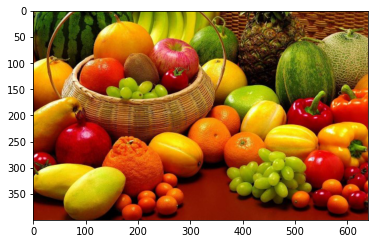

 Após detecção de bordas 


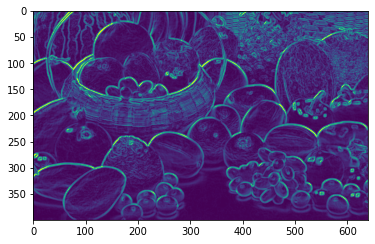

In [ ]:
%matplotlib inline

import matplotlib
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

sobel = mpimg.imread('sobel.jpg')
imagem_inicial = mpimg.imread('image.jpg')
#gradiente = mpimg.imread('gradiente.jpg')


print(" Imagem inicial ")
plt.imshow(imagem_inicial)
plt.show()

# print(" Imagem Gradiente ")
# plt.imshow(gradiente)
# plt.show()

print(" Após detecção de bordas ")
plt.imshow(sobel)
plt.show()



In [ ]:

#include <opencv2/core/utility.hpp>

double t0, t1, time;

t0 = (double)getTickCount();
# your code execution
t1 = (double)getTickCount();
//The time will be in seconds
time = (t0-t1)/getTickFrequency()

#Exemplo contabilizando o tempo de execução e salvando em arquivo

Código retirado de: https://docs.opencv.org/3.2.0/d2/d2c/tutorial_sobel_derivatives.html

In [ ]:
test1 = """
#include "opencv2/imgproc.hpp"
#include "opencv2/imgcodecs.hpp"
#include "opencv2/highgui.hpp"
#include <opencv2/core/utility.hpp>
#include <CL/cl.h>
#define LOGI  printf
using namespace cv;
int main( int, char** argv )
{
  Mat src, src_gray;
  Mat grad;

  int scale = 1;
  int delta = 0;
  int ddepth = CV_16S;
 
  int64 time;
  
  src = imread("image.jpg");   

  if( src.empty() )
    { return -1; }
 
  time = getTickCount();

  //Remove noise  
  GaussianBlur( src, src, Size(3,3), 0, 0, BORDER_DEFAULT );
 
  //Convert to gray
  cvtColor( src, src_gray, COLOR_BGR2GRAY );
 
  Mat grad_x, grad_y;
  Mat abs_grad_x, abs_grad_y;
 
  //Scharr( src_gray, grad_x, ddepth, 1, 0, scale, delta, BORDER_DEFAULT );
  Sobel( src_gray, grad_x, ddepth, 1, 0, 3, scale, delta, BORDER_DEFAULT );
  
  //Scharr( src_gray, grad_y, ddepth, 0, 1, scale, delta, BORDER_DEFAULT ); 
  Sobel( src_gray, grad_y, ddepth, 0, 1, 3, scale, delta, BORDER_DEFAULT );
  convertScaleAbs( grad_x, abs_grad_x );
  convertScaleAbs( grad_y, abs_grad_y );
  addWeighted( abs_grad_x, 0.5, abs_grad_y, 0.5, 0, grad );
 
  imwrite("sobel.jpg", grad);
 
  time = getTickCount() - time;
  printf( "detection time = %g ms\\n", time*1000/getTickFrequency());  
 
  //Writing results on file for latter processing
  FILE * pFile;
  pFile = fopen("ExecutionTime.txt", "a"); 
  fprintf(pFile, " %g", time*1000/getTickFrequency());
  fclose(pFile);

//   char *driver_version;
//   clGetDeviceInfo(0, CL_DRIVER_VERSION, sizeof(char*), &driver_version, NULL);
//   printf("OpenCL version: %s\\n", driver_version);


// cl_uint nplatforms;
// cl_int err;
// //check_error(err, "clGetPlatformIds");
//     cl_device_id device_id = NULL;
//     cl_uint ret_num_devices;
//     // Now ask OpenCL for the platform IDs:
//     cl_platform_id* platforms = (cl_platform_id*)malloc(sizeof(cl_platform_id)* nplatforms);


//     if(platforms == NULL){
//         printf("\\n Fail to allocate memory for platforms");
//     }


//    err = clGetPlatformIDs(nplatforms, platforms, NULL);
//    printf("OpenCL version: %d\\n, %d", err, nplatforms);

  //imshow( window_name, grad );
  //waitKey(0);

//------------------------------------------------------------------------------------
  cl_uint i_plat;
    cl_int err;

    // Discover the number of platforms:
    cl_uint nplatforms;
    err = clGetPlatformIDs(0, NULL, &nplatforms);

    LOGI("\\n Number of Platform %d: error = %d ", nplatforms, err );

    //check_error(err, "clGetPlatformIds");
    cl_device_id device_id = NULL;
    cl_uint ret_num_devices;
    // Now ask OpenCL for the platform IDs:
    cl_platform_id* platforms = (cl_platform_id*)malloc(sizeof(cl_platform_id)* nplatforms);


    if(platforms == NULL){
        printf("\\n Fail to allocate memory for platforms");
    }


    err = clGetPlatformIDs(nplatforms, platforms, NULL);
    LOGI("\\n clGetPlatformIDs return error = %d ", err );

    //check_error(err, "clGetPlatformIds");

    // Ask OpenCL about each platform to understand the problem:
    char name[128];
    char vendor[128];
    char version[128];
    char driver[128];
    cl_uint val = 0;
    size_t val1 = 0;
    size_t val2 = 0;
    size_t prof_tmr_res = 0;
    cl_uint MaxComputeUnit = 0;
    cl_uint MaxClockFrequency = 0;

    cl_device_type deviceType;

    cl_device_exec_capabilities exec_capabilities;

    //LOGI(ANDROID_LOG_INFO,"POOJA","AKVEDIAHE");

    for (i_plat = 0; i_plat < nplatforms; i_plat++) {
        err |= clGetPlatformInfo(platforms[i_plat], CL_PLATFORM_VENDOR, 128, vendor, NULL);
        err |= clGetPlatformInfo(platforms[i_plat], CL_PLATFORM_NAME, 128, name, NULL);
        err |= clGetPlatformInfo(platforms[i_plat], CL_PLATFORM_VERSION, 128, version, NULL);
        //check_error(err, "clGetPlatformInfo");

        LOGI("\\n Platform Info %d: Vendor = %s Name = %s Version = %s  Error = %d", i_plat, vendor, name, version,err);

        /*device info*/
        //err = clGetDeviceIDs(platforms[i_plat], CL_DEVICE_TYPE_GPU, 1, &device_id, &ret_num_devices);
        err = clGetDeviceIDs(platforms[i_plat], CL_DEVICE_TYPE_GPU, 1, &device_id, NULL);

        LOGI("\\n clGetDeviceIDs GPU  Error %d ",err );

        err |= clGetDeviceInfo(device_id, CL_DEVICE_TYPE,sizeof(cl_int), &deviceType, NULL);
        err |= clGetDeviceInfo(device_id, CL_DEVICE_VENDOR, 128, vendor, NULL);
        err |= clGetDeviceInfo(device_id, CL_DEVICE_NAME, 128, name, NULL);
        err |= clGetDeviceInfo(device_id, CL_DEVICE_VERSION, 128, version, NULL);
        err |= clGetDeviceInfo(device_id, CL_DRIVER_VERSION, 128, driver, NULL);
        err |= clGetDeviceInfo(device_id, CL_DEVICE_MAX_WORK_ITEM_DIMENSIONS, sizeof(cl_uint), &val, NULL);
        err |= clGetDeviceInfo(device_id, CL_DEVICE_PROFILING_TIMER_RESOLUTION, sizeof(size_t), &prof_tmr_res, NULL);
        err |= clGetDeviceInfo(device_id, CL_DEVICE_MAX_COMPUTE_UNITS, sizeof(cl_uint), &MaxComputeUnit, NULL);
        err |= clGetDeviceInfo(device_id, CL_DEVICE_MAX_CLOCK_FREQUENCY, sizeof(cl_uint), &MaxClockFrequency, NULL);
        err |= clGetDeviceInfo(device_id, CL_DEVICE_EXECUTION_CAPABILITIES,sizeof(cl_int), &exec_capabilities, NULL);

        LOGI("\\n Device Type %08x:",deviceType );
        for(int i =0; i < val ; i++){
            err = clGetDeviceInfo(device_id, CL_DEVICE_MAX_WORK_ITEM_SIZES, sizeof(size_t), &val1, NULL);
            LOGI("\\n MAX_WORK_ITEM_SIZES[%d] = %d,", i,val1 );
        }
        err = clGetDeviceInfo(device_id, CL_DEVICE_MAX_WORK_GROUP_SIZE, sizeof(size_t), &val2, NULL);

        LOGI("\\n MAX_WORK_ITEM_DIMENSIONS = %d , MAX_WORK_GROUP_SIZE = %d ", val,val2 );
        LOGI("\\n device_id FOR Platform = %d vender = %s, device name = %s, device version = %s, driver version = %s", i_plat, vendor, name, version, driver);
        LOGI("\\n CL_DEVICE_PROFILING_TIMER_RESOLUTION = %d",prof_tmr_res );
        LOGI("\\n Max Compute Unit = %d",MaxComputeUnit );
        LOGI("\\n Max Clock Frequency = %d",MaxClockFrequency );
        LOGI("\\n Device exec capabilities = %08x",exec_capabilities );
    }
    return 0;


}
"""

In [ ]:
text_file = open("test1.cpp", "w")
text_file.write(test1)
text_file.close()

In [ ]:
!g++ -I/usr/local/cuda-10.0/targets/x86_64-linux/include test1.cpp -o test1  `pkg-config --cflags --libs opencv` -lOpenCL

test1.cpp: In function ‘int main(int, char**)’:
test1.cpp:151:48: warning: format ‘%x’ expects argument of type ‘unsigned int’, but argument 2 has type ‘cl_device_type {aka long unsigned int}’ [-Wformat=]
         LOGI("\n Device Type %08x:",deviceType );
                                                ^
test1.cpp:154:61: warning: format ‘%d’ expects argument of type ‘int’, but argument 3 has type ‘size_t {aka long unsigned int}’ [-Wformat=]
             LOGI("\n MAX_WORK_ITEM_SIZES[%d] = %d,", i,val1 );
                                                             ^
test1.cpp:158:87: warning: format ‘%d’ expects argument of type ‘int’, but argument 3 has type ‘size_t {aka long unsigned int}’ [-Wformat=]
         LOGI("\n MAX_WORK_ITEM_DIMENSIONS = %d , MAX_WORK_GROUP_SIZE = %d ", val,val2 );
                                                                                       ^
test1.cpp:160:74: warning: format ‘%d’ expects argument of type ‘int’, but argument 2 has type ‘size_t {aka 

In [ ]:
!./test1

detection time = 178.354 ms

 Number of Platform 1: error = 0 
 clGetPlatformIDs return error = 0 
 Platform Info 0: Vendor = NVIDIA Corporation Name = NVIDIA CUDA Version = OpenCL 1.2 CUDA 10.1.152  Error = 0
 clGetDeviceIDs GPU  Error 0 
 Device Type 01010000:
 MAX_WORK_ITEM_SIZES[0] = 0,
 MAX_WORK_ITEM_SIZES[1] = 0,
 MAX_WORK_ITEM_SIZES[2] = 0,
 MAX_WORK_ITEM_DIMENSIONS = 3 , MAX_WORK_GROUP_SIZE = 1024 
 device_id FOR Platform = 0 vender = NVIDIA Corporation, device name = Tesla T4, device version = OpenCL 1.2 CUDA, driver version = 418.67
 CL_DEVICE_PROFILING_TIMER_RESOLUTION = 1000
 Max Compute Unit = 40
 Max Clock Frequency = 1590
 Device exec capabilities = 00000000

Criando um vetor para ler os resultados do arquivo. **OBS: OS RESULTADOS ESTÃO EM MILISEGUNDOS**

In [ ]:
results = []
with open("ExecutionTime.txt", "r") as file1:
    for line in file1.readlines():
        results = [float(i) for i in line.split(" ") if i.strip()]

In [ ]:
results

[114.241, 23.2606, 18.2154, 20.4622, 16.9441, 20.8176]

In [ ]:
!ldd /usr/local/lib/libopencv_core.so

ldd: /usr/local/lib/libopencv_core.so: No such file or directory


#Test custom OpenCL kernel in OpenCV 

In [ ]:
def save_file(my_file, filename):
    filename = filename + ".cpp"
    text_file = open(filename, "w")
    text_file.write(my_file)
    text_file.close()

In [ ]:
test = """
#include <iostream>
#include "opencv2/imgproc.hpp"
#include "opencv2/imgcodecs.hpp"
#include "opencv2/highgui.hpp"
#include <opencv2/core/utility.hpp>
#include <opencv2/core/ocl.hpp>

#include <CL/cl.h>
using namespace cv;
int main(int _argc, const char** _argv)
{
    cv::ocl::DevicesInfo devInfo;
    int res = cv::ocl::getOpenCLDevices(devInfo);
    if(res == 0)
    {
        std::cout << "There is no OPENCL Here !" << std::endl;
    }else
    {
        for(int i = 0 ; i < devInfo.size() ; ++i)
        {
            std::cout << "Device : " << devInfo[i]->deviceName << " is present" << std::endl;
        }
    }
    cv::ocl::setDevice(devInfo[0]);        // select device to use
    std::cout << VERSION_EPOCH << "." << VERSION_MAJOR << "." << VERSION_MINOR << std::endl;
    const char *KernelSource = "\\n" \\
    "__kernel void square(                       \\n" \\
    "   __global uchar* input,                   \\n" \\
    "   __global uchar* output)                  \\n" \\
    "{                                           \\n" \\
    "   int i = get_global_id(0);                \\n" \\
    "   output[i] = input[i] * input[i];         \\n" \\
    "}\\n";
    cv::ocl::ProgramSource src("square", KernelSource);
    std::size_t globalThreads[3]={1,0,0};
    std::size_t localThreads[3]={5,5,0};
    cv::ocl::oclMat source(cv::Size(500,500), CV_8UC1);
    cv::ocl::oclMat dest(cv::Size(500,500), CV_8UC1);

    std::vector<std::pair<size_t , const void *> > args;
    args.push_back( std::make_pair( 4, (void *) &source.data ));
    args.push_back( std::make_pair( 4, (void *) &dest.data ));

cv::ocl::openCLExecuteKernelInterop(cv::ocl::Context::getContext(), src, "square",
                                     globalThreads, localThreads, args, -1, -1, "");
    return 0;
}
"""

In [ ]:
save_file(test, "test")

In [ ]:
!g++ -I/usr/local/cuda-10.1/targets/x86_64-linux/include test.cpp -o test  `pkg-config --cflags --libs opencv` -lOpenCL

test.cpp: In function ‘int main(int, const char**)’:
test.cpp:13:14: error: ‘DevicesInfo’ is not a member of ‘cv::ocl’
     cv::ocl::DevicesInfo devInfo;
              ^~~~~~~~~~~
test.cpp:13:14: note: suggested alternative: ‘Device’
     cv::ocl::DevicesInfo devInfo;
              ^~~~~~~~~~~
              Device
test.cpp:14:24: error: ‘getOpenCLDevices’ is not a member of ‘cv::ocl’
     int res = cv::ocl::getOpenCLDevices(devInfo);
                        ^~~~~~~~~~~~~~~~
test.cpp:14:24: note: suggested alternative: ‘getOpenCLAllocator’
     int res = cv::ocl::getOpenCLDevices(devInfo);
                        ^~~~~~~~~~~~~~~~
                        getOpenCLAllocator
test.cpp:14:41: error: ‘devInfo’ was not declared in this scope
     int res = cv::ocl::getOpenCLDevices(devInfo);
                                         ^~~~~~~
test.cpp:25:14: error: ‘setDevice’ is not a member of ‘cv::ocl’
     cv::ocl::setDevice(devInfo[0]);        // select device to use
              ^~~~~~~~~
